**Healthcare Data Objective: Assessing the Strain on Healthcare Resources**

Importing necessary libraries

In [1]:
import math
import collections

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import textwrap

%matplotlib inline

In [2]:
# Load the CSV file into a DataFrame
#file_path = 'merged_covid_data.csv'

death = pd.read_csv('COVID_DEATHS.csv')
vaccine = pd.read_csv('COVID_VACCINATIONS.csv')

Dataset Shape

In [3]:
print(death.shape)
print(vaccine.shape)

(302749, 26)
(302749, 45)


Checking the Data types in the covid death dataset

In [4]:
death.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 26 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   iso_code                            302749 non-null  object 
 1   continent                           288347 non-null  object 
 2   location                            302749 non-null  object 
 3   date                                302749 non-null  object 
 4   population                          302749 non-null  int64  
 5   total_cases                         266771 non-null  float64
 6   new_cases                           294064 non-null  float64
 7   new_cases_smoothed                  292800 non-null  float64
 8   total_deaths                        246214 non-null  float64
 9   new_deaths                          294139 non-null  float64
 10  new_deaths_smoothed                 292909 non-null  float64
 11  total_cases_per_million   

Checking the Data types in the covid vaccine dataset

In [5]:
vaccine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302749 entries, 0 to 302748
Data columns (total 45 columns):
 #   Column                                      Non-Null Count   Dtype  
---  ------                                      --------------   -----  
 0   iso_code                                    302749 non-null  object 
 1   continent                                   288347 non-null  object 
 2   location                                    302749 non-null  object 
 3   date                                        302749 non-null  object 
 4   total_tests                                 79387 non-null   float64
 5   new_tests                                   75403 non-null   float64
 6   total_tests_per_thousand                    79387 non-null   float64
 7   new_tests_per_thousand                      75403 non-null   float64
 8   new_tests_smoothed                          103965 non-null  float64
 9   new_tests_smoothed_per_thousand             103965 non-null  float64
 

Checking for duplicates in both df

In [6]:
# Check for duplicates in 'death' DataFrame
duplicate_rows_death = death.duplicated()
print("Number of duplicate rows in 'death':", duplicate_rows_death.sum())

# Check for duplicates in 'vaccine' DataFrame
duplicate_rows_vaccine = vaccine.duplicated()
print("Number of duplicate rows in 'vaccine':", duplicate_rows_vaccine.sum())

Number of duplicate rows in 'death': 0
Number of duplicate rows in 'vaccine': 0


Combining the dfs  into one df

In [7]:
combined = pd.merge(death, vaccine, how='outer')
print(combined.shape)
combined.head()


(302749, 67)


,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,01/03/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,01/04/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,01/05/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,01/06/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,01/07/2020,41128772,NaN,0.0,NaN,NaN,0.0,...,NaN,NaN,37.75,0.5,64.83,0.51,NaN,NaN,NaN,NaN


**Cleaning andPreprocessing**

In [8]:
#Finding out anomalies in the dataframe by getting statistical summary of each column
combined.describe()

,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,3.027490e+05,2.667710e+05,2.940640e+05,2.928000e+05,2.462140e+05,294139.000000,292909.000000,266771.000000,294064.000000,292800.000000,...,175955.000000,173562.000000,114845.000000,207046.000000,278389.000000,227359.000000,1.029500e+04,10295.000000,10295.000000,10295.000000
mean,1.283508e+08,5.525632e+06,1.100018e+04,1.104556e+04,7.890977e+04,97.976117,98.374032,84395.533693,165.822440,166.511964,...,10.796895,32.912070,50.794372,3.098034,73.721399,0.723051,4.727287e+04,9.535368,12.996518,1453.830948
std,6.604840e+08,3.465076e+07,1.043446e+05,1.016488e+05,4.087464e+05,606.914602,597.602496,134636.639039,1134.538414,642.891130,...,10.781931,13.572489,31.956624,2.548704,7.397024,0.149347,1.377826e+05,13.082029,26.634303,1830.272539
min,4.700000e+01,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.190000,0.100000,53.280000,0.390000,-3.772610e+04,-44.230000,-95.920000,-1984.280000
25%,4.490020e+05,6.265000e+03,0.000000e+00,1.286000e+00,1.180000e+02,0.000000,0.000000,1889.971500,0.000000,0.294000,...,1.900000,22.600000,20.860000,1.300000,69.590000,0.600000,2.185000e+01,0.420000,-1.040000,15.450000
50%,5.882259e+06,5.986600e+04,1.900000e+01,4.000000e+01,1.193000e+03,0.000000,0.286000,19249.100000,2.808000,11.391000,...,6.300000,33.100000,49.840000,2.500000,75.050000,0.740000,4.464500e+03,7.750000,6.750000,881.370000
75%,2.830170e+07,6.149885e+05,5.610000e+02,6.530000e+02,1.038675e+04,6.000000,7.000000,102486.778500,73.163500,108.147500,...,19.300000,41.300000,83.240000,4.200000,79.460000,0.830000,3.174990e+04,15.520000,18.545000,2372.125000
max,7.975105e+09,7.627904e+08,7.460100e+06,6.410233e+06,6.897012e+06,20005.000000,14578.571000,731762.140000,228872.025000,37241.781000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.960000,1.282260e+06,76.550000,377.040000,10329.520000


In [9]:
# Remove rows where 'continent' is null
combined = combined.dropna(subset=['continent'])
print(combined.shape)

(288347, 67)


In [10]:
#Converting Date from Object to Date Type
combined['date'] = pd.to_datetime(combined['date'])

In [11]:
# Filling NaN Values with 0
combined.fillna(0, inplace=True)
combined.head()

,iso_code,continent,location,date,population,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,41128772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
1,AFG,Asia,Afghanistan,2020-01-04,41128772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
2,AFG,Asia,Afghanistan,2020-01-05,41128772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
3,AFG,Asia,Afghanistan,2020-01-06,41128772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
4,AFG,Asia,Afghanistan,2020-01-07,41128772,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0


In [12]:
combined.shape

(288347, 67)

In [13]:
# Check for null values across all columns
null_columns = combined.columns[combined.isnull().any()].tolist()
print(f"Columns with null values: {null_columns}")

Columns with null values: []


In [14]:
#Checking for Future Dates
from datetime import datetime
today = datetime.now()

anomalies_future_dates = combined[pd.to_datetime(combined['date']) > today]
anomalies_future_dates.shape

(0, 67)

In [15]:
#Removing columns that might be irrelevant for most analyses
# List of columns to remove
columns_to_remove = ['iso_code', 'new_cases_smoothed', 'new_deaths_smoothed', 'total_cases_per_million', 
                     'new_cases_per_million']

# Remove specified columns
combined_dropped = combined.drop(columns=columns_to_remove)
combined_dropped

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-03,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-01-04,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-01-05,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-01-06,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-01-07,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302744,Africa,Zimbabwe,2023-04-08,16320539,264578.0,2.0,5684.0,1.0,0.254,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0
302745,Africa,Zimbabwe,2023-04-09,16320539,264582.0,4.0,5684.0,0.0,0.289,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0
302746,Africa,Zimbabwe,2023-04-10,16320539,264584.0,2.0,5684.0,0.0,0.254,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0
302747,Africa,Zimbabwe,2023-04-11,16320539,264584.0,0.0,5684.0,0.0,0.193,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0


In [16]:
combined_dropped

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-03,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-01-04,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-01-05,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-01-06,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-01-07,41128772,0.0,0.0,0.0,0.0,0.000,0.000,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302744,Africa,Zimbabwe,2023-04-08,16320539,264578.0,2.0,5684.0,1.0,0.254,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0
302745,Africa,Zimbabwe,2023-04-09,16320539,264582.0,4.0,5684.0,0.0,0.289,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0
302746,Africa,Zimbabwe,2023-04-10,16320539,264584.0,2.0,5684.0,0.0,0.254,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0
302747,Africa,Zimbabwe,2023-04-11,16320539,264584.0,0.0,5684.0,0.0,0.193,348.273,...,1.6,30.7,36.79,1.7,61.49,0.57,0.0,0.0,0.0,0.0


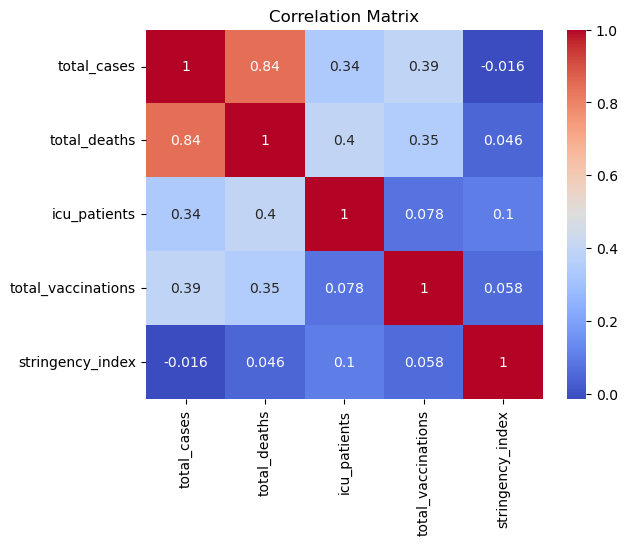

In [17]:
# Correlation matrix for selected variables
correlation_matrix = combined_dropped[['total_cases', 'total_deaths', 'icu_patients', 'total_vaccinations', 'stringency_index']].corr()

# Plot the correlation matrix using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Data Analytics**

In [18]:
regional_df= combined_dropped.copy()
regional_df.head()

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,Asia,Afghanistan,2020-01-03,41128772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
1,Asia,Afghanistan,2020-01-04,41128772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
2,Asia,Afghanistan,2020-01-05,41128772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
3,Asia,Afghanistan,2020-01-06,41128772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0
4,Asia,Afghanistan,2020-01-07,41128772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,37.75,0.5,64.83,0.51,0.0,0.0,0.0,0.0


***Correlation Analyses***

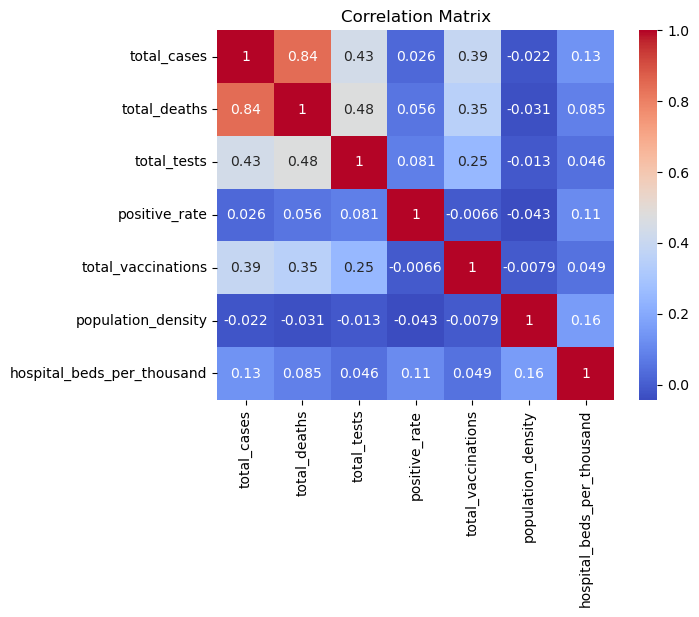

In [19]:
selected_columns = [
    'total_cases', 'total_deaths', 'total_tests', 'positive_rate',
    'total_vaccinations', 'population_density', 'hospital_beds_per_thousand'
]
correlation_matrix2 = regional_df[selected_columns].corr() # Compute the correlation matrix

sns.heatmap(correlation_matrix2, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**KPIs Calculation**

1. Grouping the dataframe with continent location year month and sorting the values by continent and reseting the index

2.  Calculate required KPIs as added columns

In [20]:
# Extract year and month from the 'date' column to new columns
regional_df['year'] = regional_df['date'].dt.year
regional_df['month'] = regional_df['date'].dt.strftime('%b')

# Group the dataframe by specified columns and sum the numeric columns
grouped_df = regional_df.groupby(['continent', 'location', 'year', 'month']).sum(numeric_only=True).reset_index()

# Calculate new columns based on the grouped data
grouped_df['percent_of_new_cases'] = (grouped_df['new_cases'] / grouped_df['total_cases'].replace(0, np.nan)) * 100
grouped_df['vaccination_success_rate'] = (grouped_df['people_fully_vaccinated'] / grouped_df['population'].replace(0, np.nan)) * 100
grouped_df['case_fatality_rate'] = (grouped_df['total_deaths'] / grouped_df['total_cases'].replace(0, np.nan)) * 100
grouped_df['vaccination_coverage'] = (grouped_df['total_vaccinations'] / grouped_df['population'].replace(0, np.nan)) * 100
grouped_df['healthcare_strain_index'] = grouped_df['total_cases'] / grouped_df['hospital_beds_per_thousand'].replace(0, np.nan)

grouped_df.head()

,continent,location,year,month,population,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,percent_of_new_cases,vaccination_success_rate,case_fatality_rate,vaccination_coverage,healthcare_strain_index
0,Africa,Algeria,2020,Apr,1347096840,66183.0,3264.0,8791.0,406.0,66.456,...,22.50,-329.1,-0.51,1.07,-7.57,4.931780,0.0,13.282867,0.0,1161.105263
1,Africa,Algeria,2020,Aug,1392000068,1171031.0,14315.0,41814.0,311.0,334.444,...,23.25,28323.8,22.82,53.42,651.85,1.222427,0.0,3.570700,0.0,19881.680815
2,Africa,Algeria,2020,Dec,1392000068,2866995.0,17090.0,80901.0,341.0,423.506,...,23.25,49888.7,26.86,29.47,1148.14,0.596095,0.0,2.821805,0.0,48675.636672
3,Africa,Algeria,2020,Feb,1302193612,4.0,1.0,0.0,0.0,0.012,...,21.75,-536.3,-1.60,-0.61,-12.34,25.000000,0.0,0.000000,0.0,0.072595
4,Africa,Algeria,2020,Jan,1302193612,0.0,0.0,0.0,0.0,0.000,...,21.75,-438.9,-2.49,-2.49,-10.10,NaN,0.0,NaN,0.0,0.000000


In [21]:
# Fill NaN values with 0 in the new columns
new_columns = ['percent_of_new_cases', 'vaccination_success_rate', 'case_fatality_rate', 'vaccination_coverage', 'healthcare_strain_index']
grouped_df[new_columns] = grouped_df[new_columns].fillna(0)

# Convert columns to categorical types for efficiency
cat_columns = ['continent', 'location', 'year', 'month']
grouped_df[cat_columns] = grouped_df[cat_columns].astype('category')

#print(regional_df['healthcare_strain_index'].describe())

***Regional Time-Series Analysis for Global Trends***

***Bar Plots for KPIs by Continent***

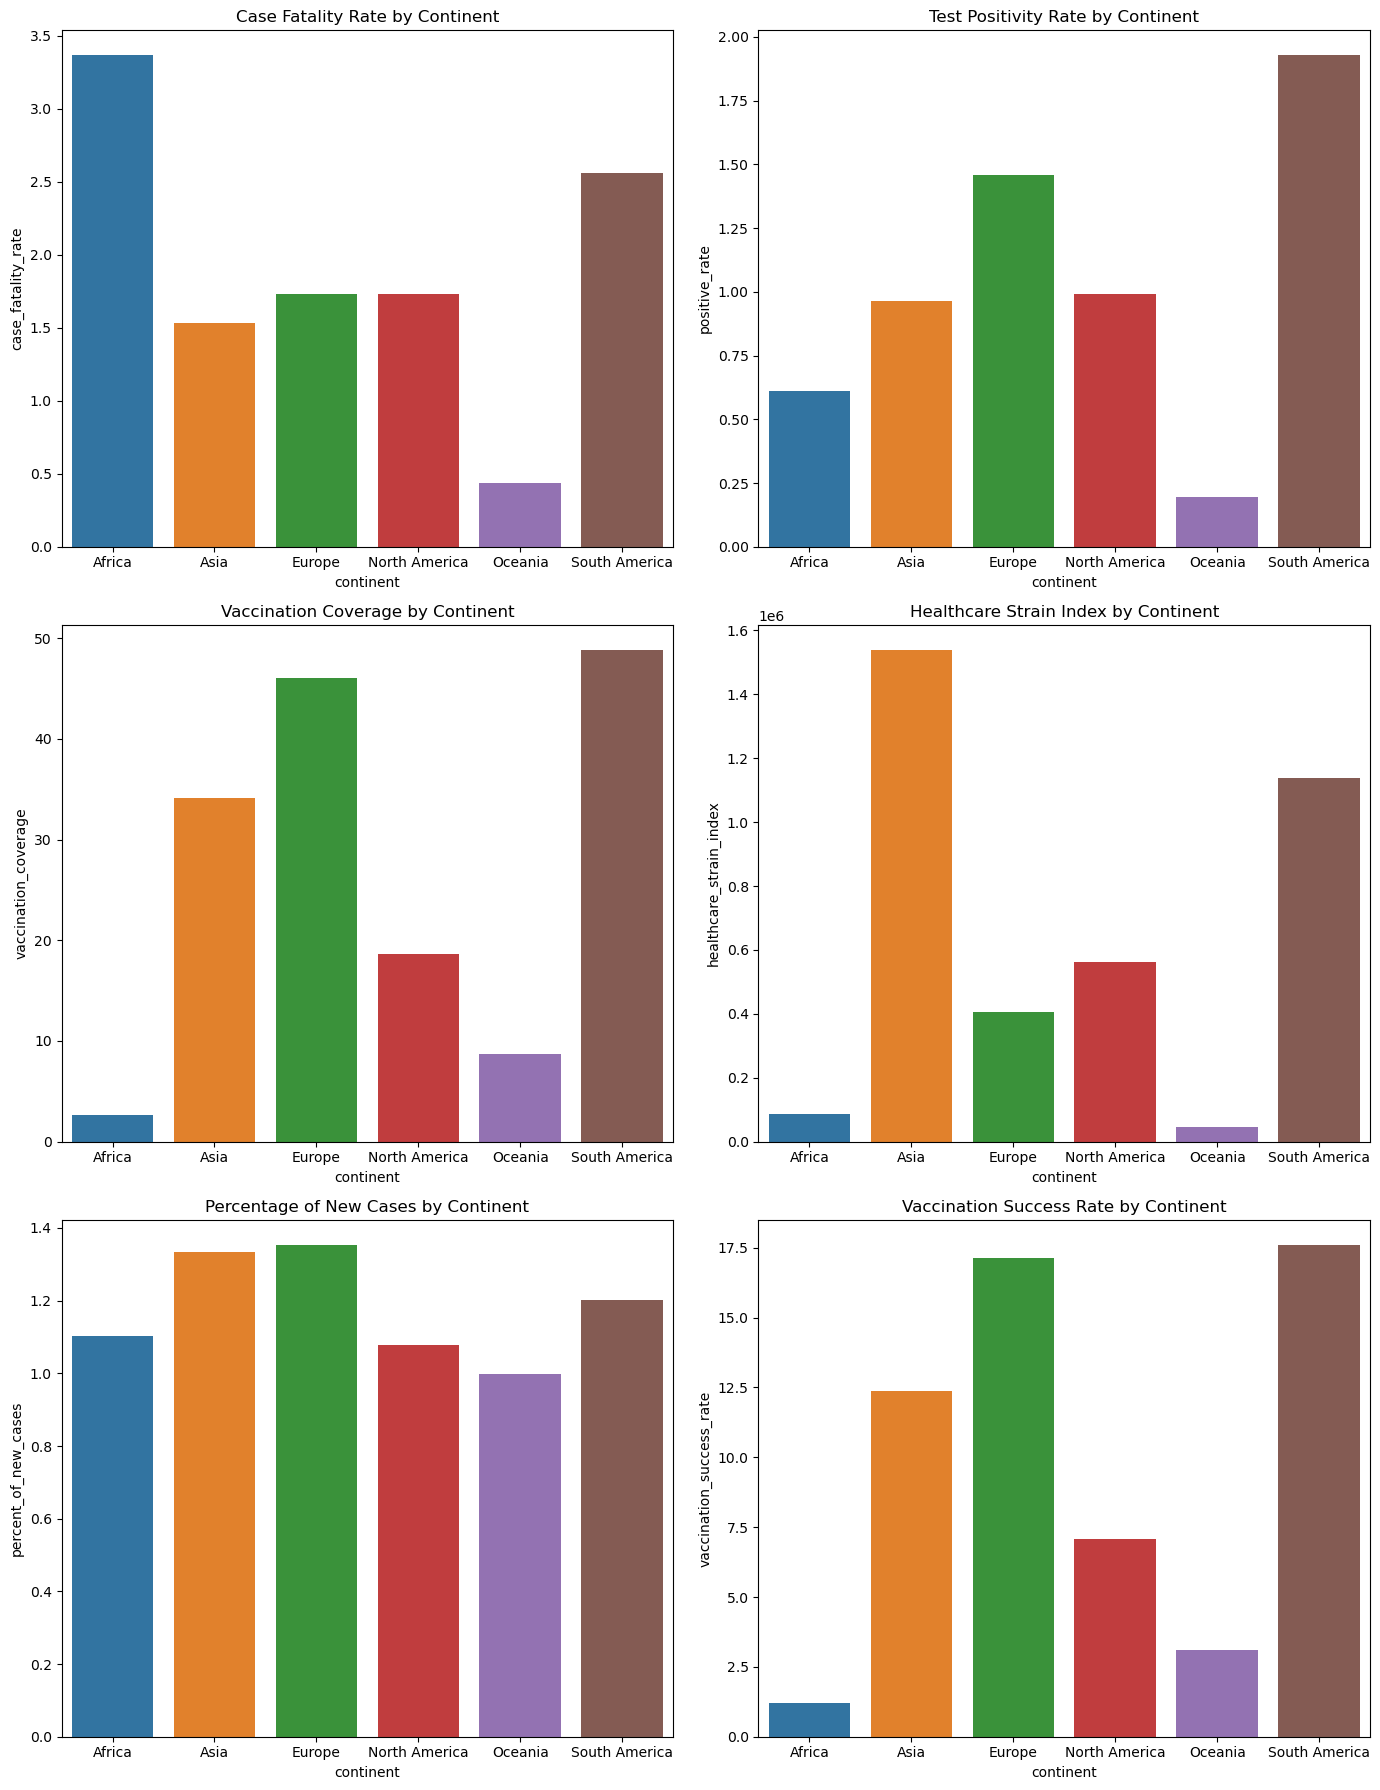

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(14, 18))
axes = axes.flatten()

# Case Fatality Rate by Continent
sns.barplot(x='continent', y='case_fatality_rate', data=grouped_df, ax=axes[0], errorbar=None)
axes[0].set_title('Case Fatality Rate by Continent')

# Test Positivity Rate by Continent
sns.barplot(x='continent', y='positive_rate', data=grouped_df, ax=axes[1], errorbar=None)
axes[1].set_title('Test Positivity Rate by Continent')

# Vaccination Coverage by Continent
sns.barplot(x='continent', y='vaccination_coverage', data=grouped_df, ax=axes[2], errorbar=None)
axes[2].set_title('Vaccination Coverage by Continent')

# Healthcare Strain Index by Continent
sns.barplot(x='continent', y='healthcare_strain_index', data=grouped_df, ax=axes[3], errorbar=None)
axes[3].set_title('Healthcare Strain Index by Continent')

# Percentage of New cases by Continent
sns.barplot(x='continent', y='percent_of_new_cases', data=grouped_df, ax=axes[4], errorbar=None)
axes[4].set_title('Percentage of New Cases by Continent')

# Vaccination Success Rate  by Continent
sns.barplot(x='continent', y='vaccination_success_rate', data=grouped_df, ax=axes[5], errorbar=None)
axes[5].set_title('Vaccination Success Rate by Continent')

plt.tight_layout()
plt.show()


***Trend Analysis*** for 9 most relevant trends 

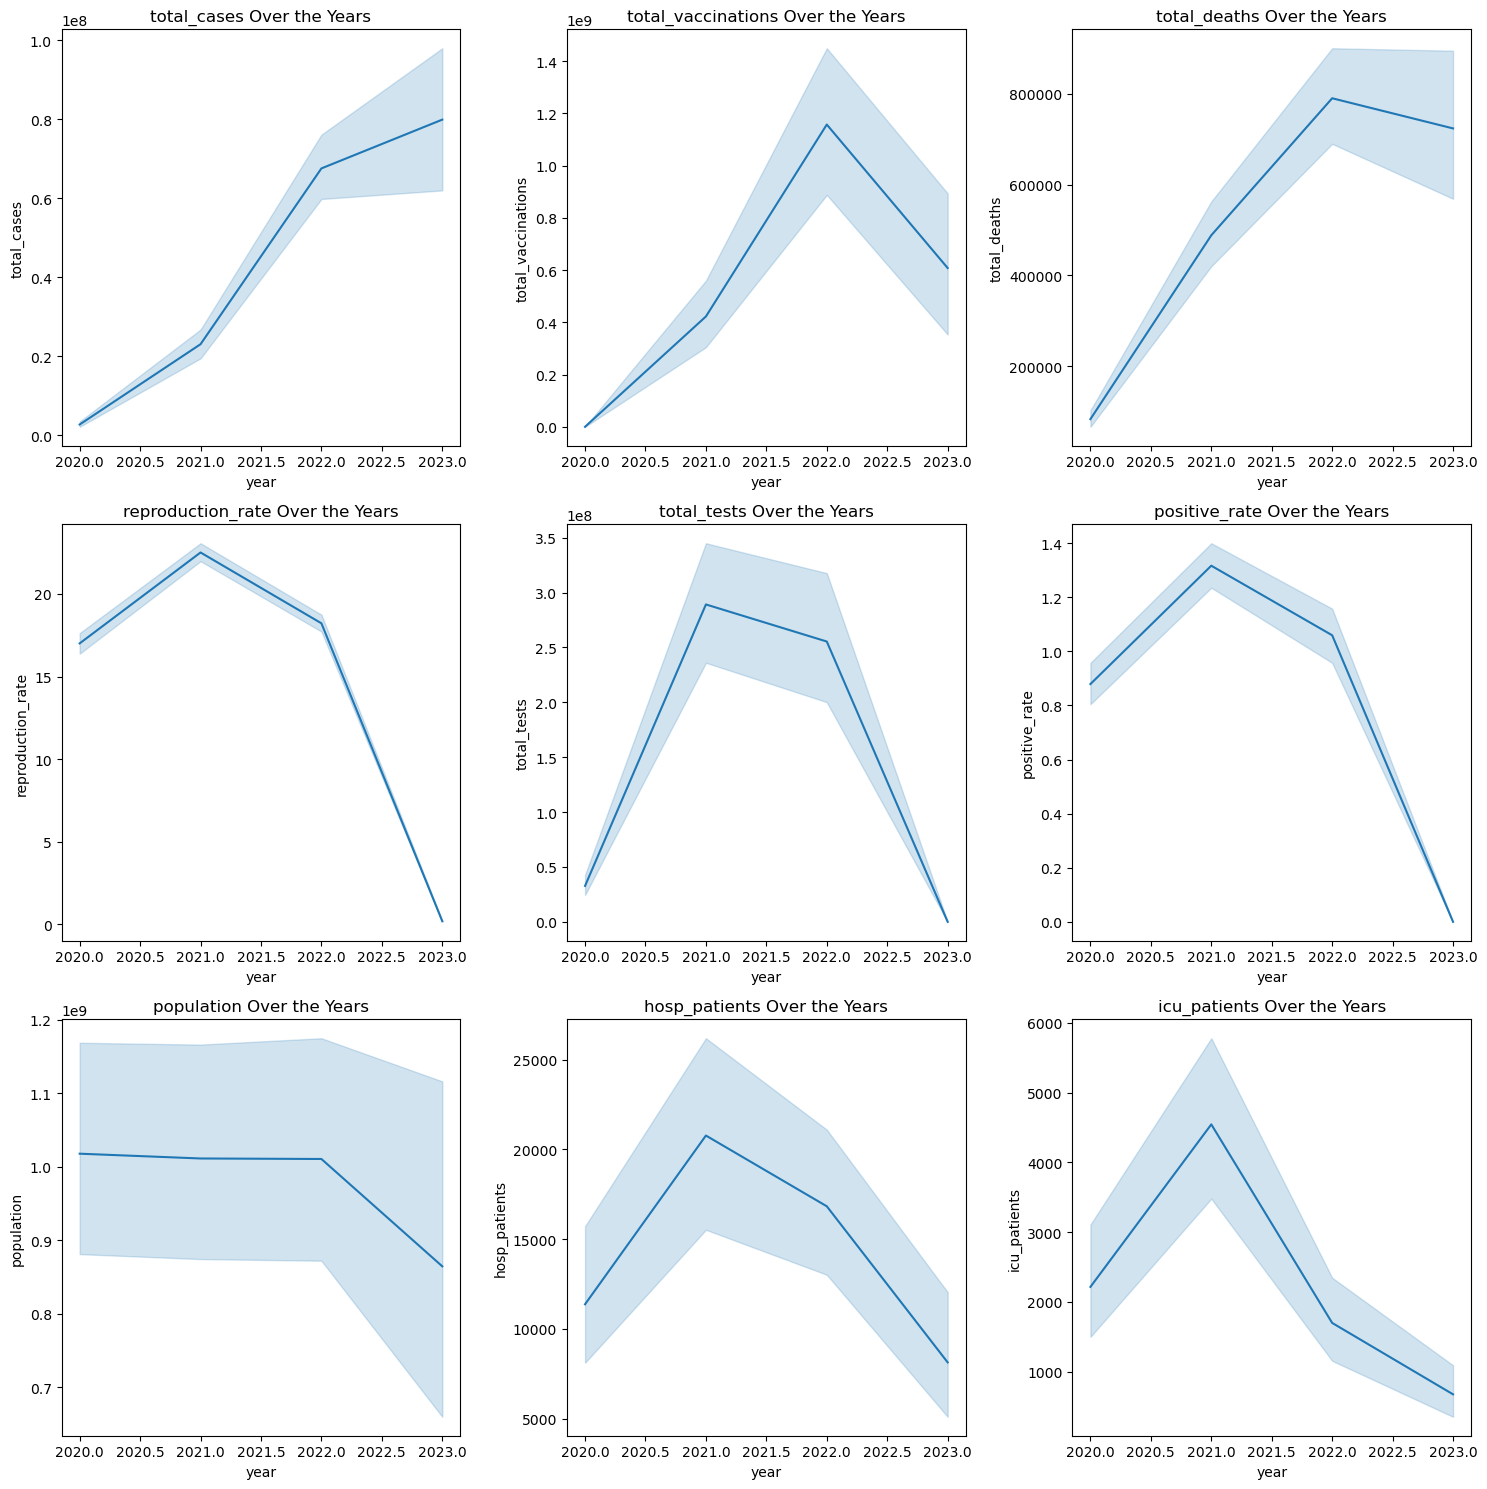

In [23]:
columns_to_plot = [
    'total_cases',  'total_vaccinations','total_deaths', 
  'reproduction_rate', 'total_tests', 'positive_rate',
   'population',  'hosp_patients','icu_patients'
]

fig, axes = plt.subplots(3, 3, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    sns.lineplot(x='year', y=col, data=grouped_df, ax=axes[i])
    axes[i].set_title(f'{col} Over the Years')

plt.tight_layout()
plt.show()

***Trends and Relationships Across Different Continents Over the Years.***

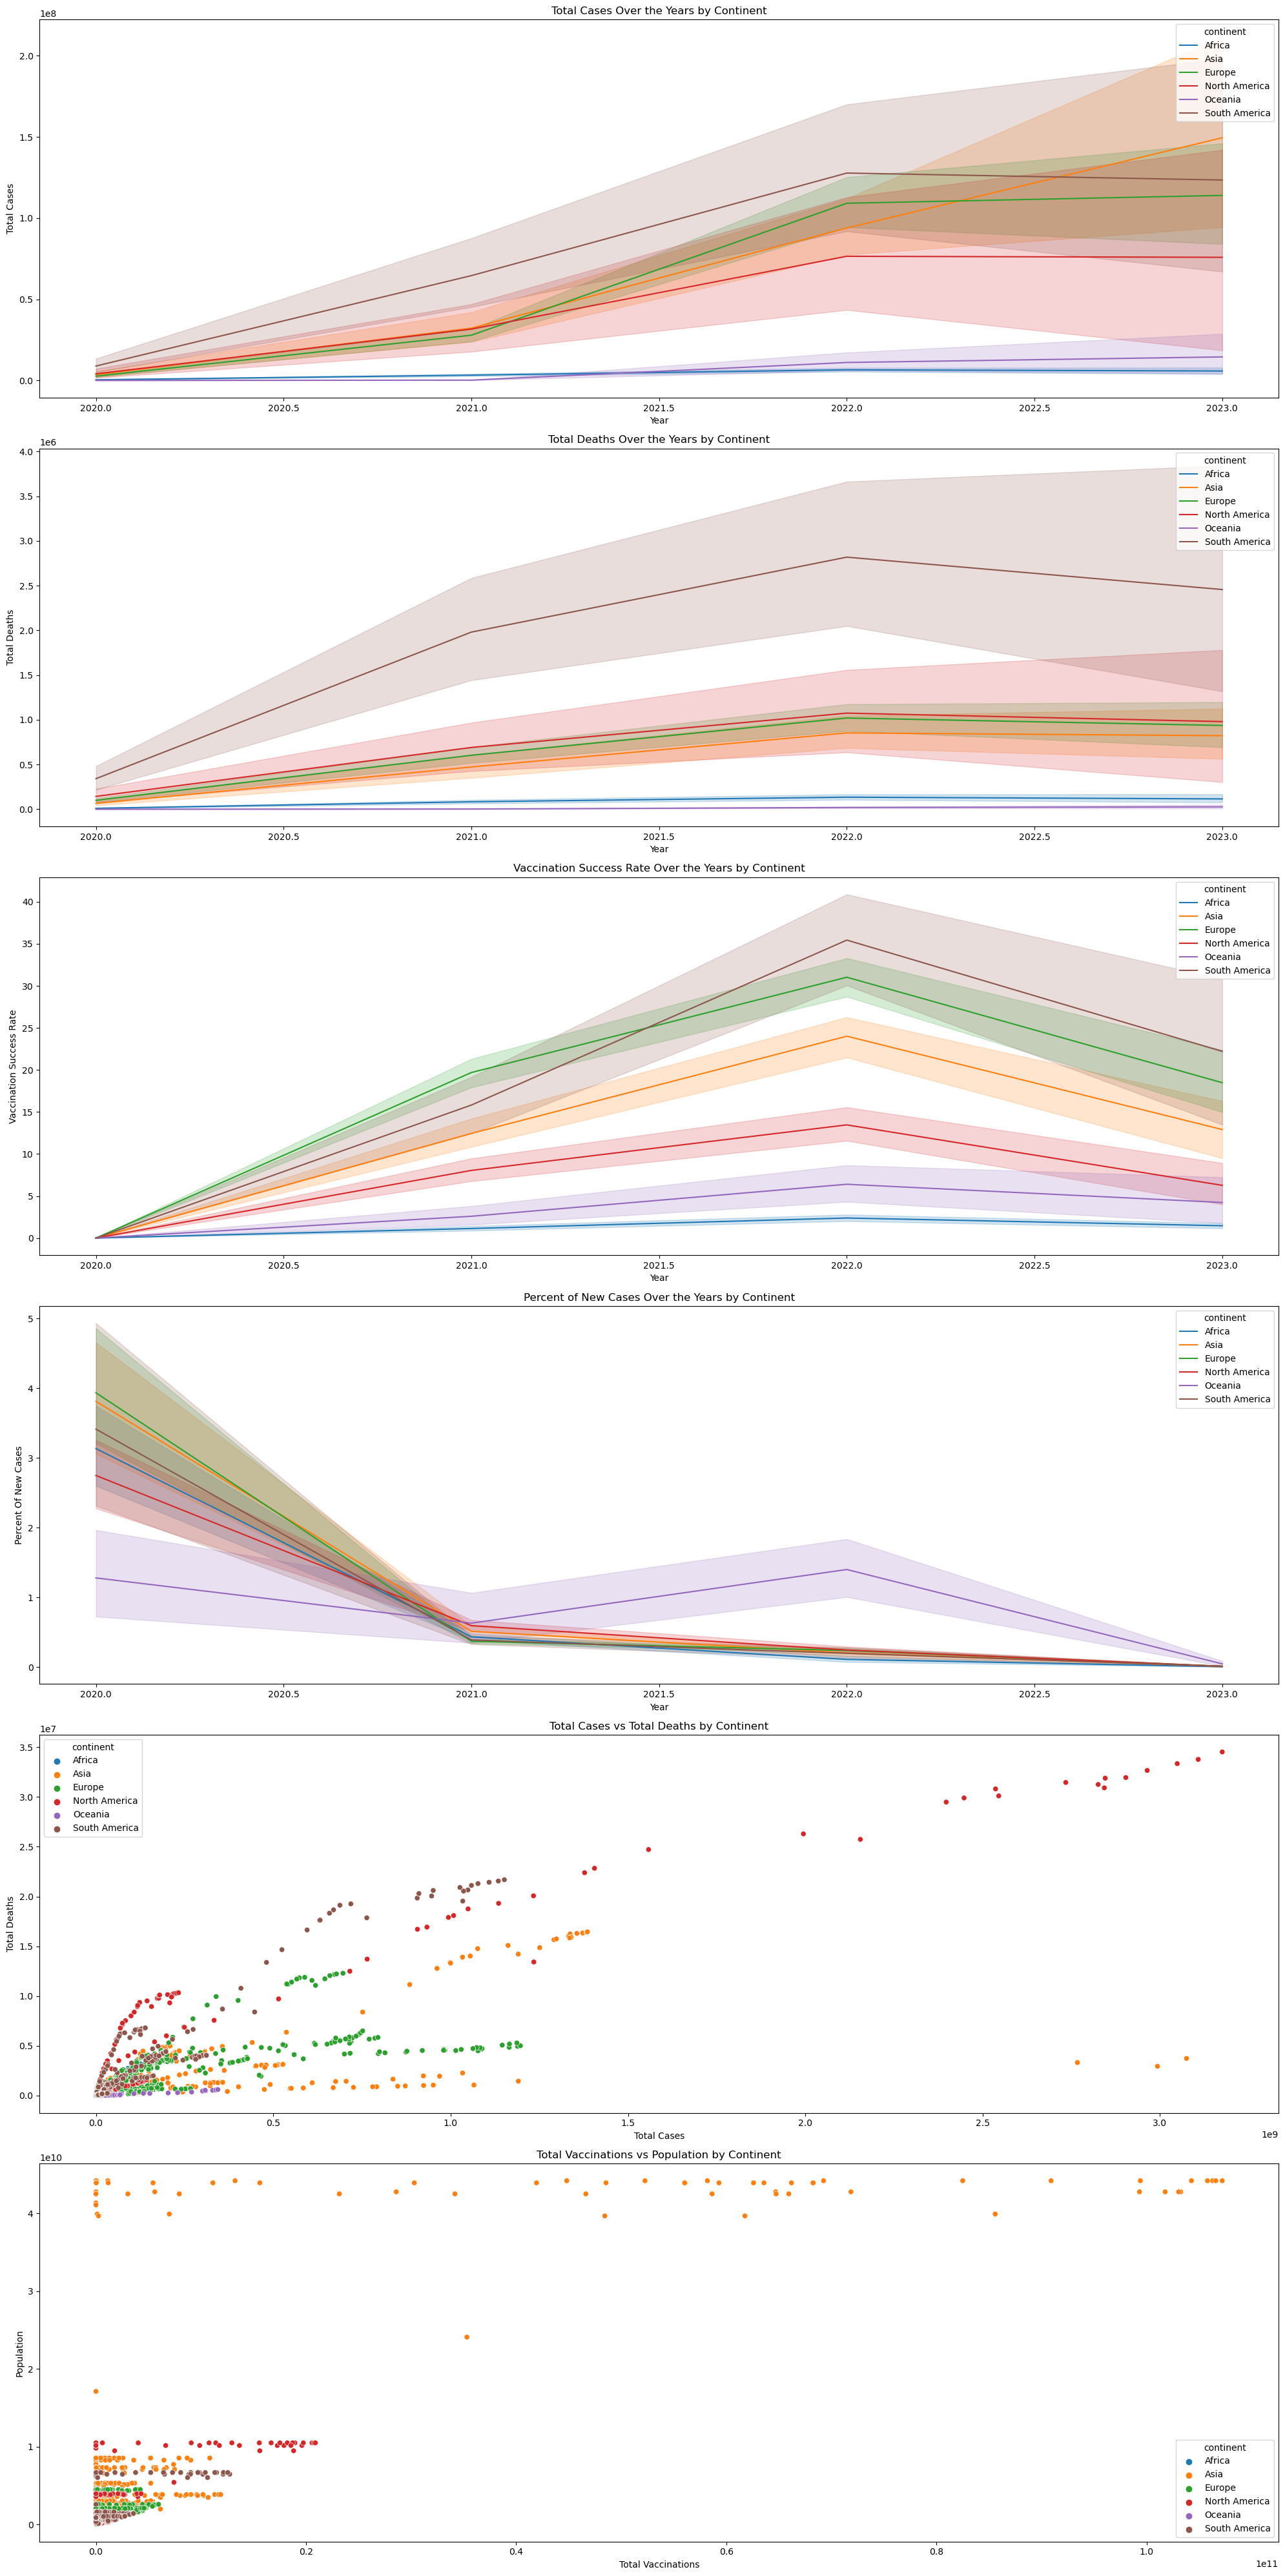

In [24]:
plot_specs = [# Columns and plot types
    ('year', 'line', 'Total Cases Over the Years by Continent', 'total_cases'),
    ('year', 'line', 'Total Deaths Over the Years by Continent', 'total_deaths'),
    ('year', 'line', 'Vaccination Success Rate Over the Years by Continent', 'vaccination_success_rate'),
    ('year', 'line', 'Percent of New Cases Over the Years by Continent', 'percent_of_new_cases'),
    ('total_cases', 'scatter', 'Total Cases vs Total Deaths by Continent', 'total_deaths'),
    ('total_vaccinations', 'scatter', 'Total Vaccinations vs Population by Continent', 'population')
]

fig, axes = plt.subplots(len(plot_specs), 1, figsize=(20, 40)) # Create subplots

# Flatten axes for easy iteration if more than 1 row and 1 column
if len(plot_specs) > 1:
    axes = axes.flatten()

# Loop through plot specifications
for ax, (x, plot_type, title, y) in zip(axes, plot_specs):
    if plot_type == 'line':
        sns.lineplot(x=x, y=y, hue='continent', data=grouped_df, ax=ax)
    elif plot_type == 'scatter':
        sns.scatterplot(x=x, y=y, hue='continent', data=grouped_df, ax=ax)
           
    ax.set_title(title)
    ax.set_xlabel(x.replace('_', ' ').title())
    ax.set_ylabel(y.replace('_', ' ').title())

# Adjust layout
plt.tight_layout()
plt.show()


***Top 10 Locations Analysis Over the Past 5 Years***

 Identifying Top 10 Locations

In [25]:
location_df = combined_dropped.sort_values(['date', 'location'])

In [26]:
# Extract year and month from the 'date' column to new columns
location_df['year'] = location_df['date'].dt.year
location_df['month'] = location_df['date'].dt.strftime('%b')

Plotting Important Metrics for Top 10 Locations

In [27]:
location_df['percent_of_new_cases'] = (location_df['new_cases'] / location_df['total_cases'].replace(0, np.nan)) * 100
location_df['vaccination_success_rate'] = (location_df['people_fully_vaccinated'] / location_df['population'].replace(0, np.nan)) * 100
location_df.fillna(0, inplace=True)

columns_to_plot = ['total_cases', 'total_deaths', 'vaccination_success_rate', 'percent_of_new_cases', 'total_boosters']
last_5_years = location_df['year'].unique()[-5:] # Take the last 5 unique years

In [28]:
# Precompute the top 10 locations for each column for each year
top_locations = {}

for year in last_5_years:
    top_locations[year] = {}
    yearly_data = location_df[location_df['year'] == year]
    
    for col in columns_to_plot:
        # For cumulative columns, we take the last available data point in the year for each location
        if col != 'positive_rate':
            sorted_df = yearly_data.drop_duplicates(subset=['location'], keep='last').sort_values(by=col, ascending=False)
        # For non-cumulative columns like positive_rate, we can directly sort
        else:
            sorted_df = yearly_data.sort_values(by=col, ascending=False)
        
        top_10_locations = sorted_df['location'].head(10).values
        top_locations[year][col] = top_10_locations

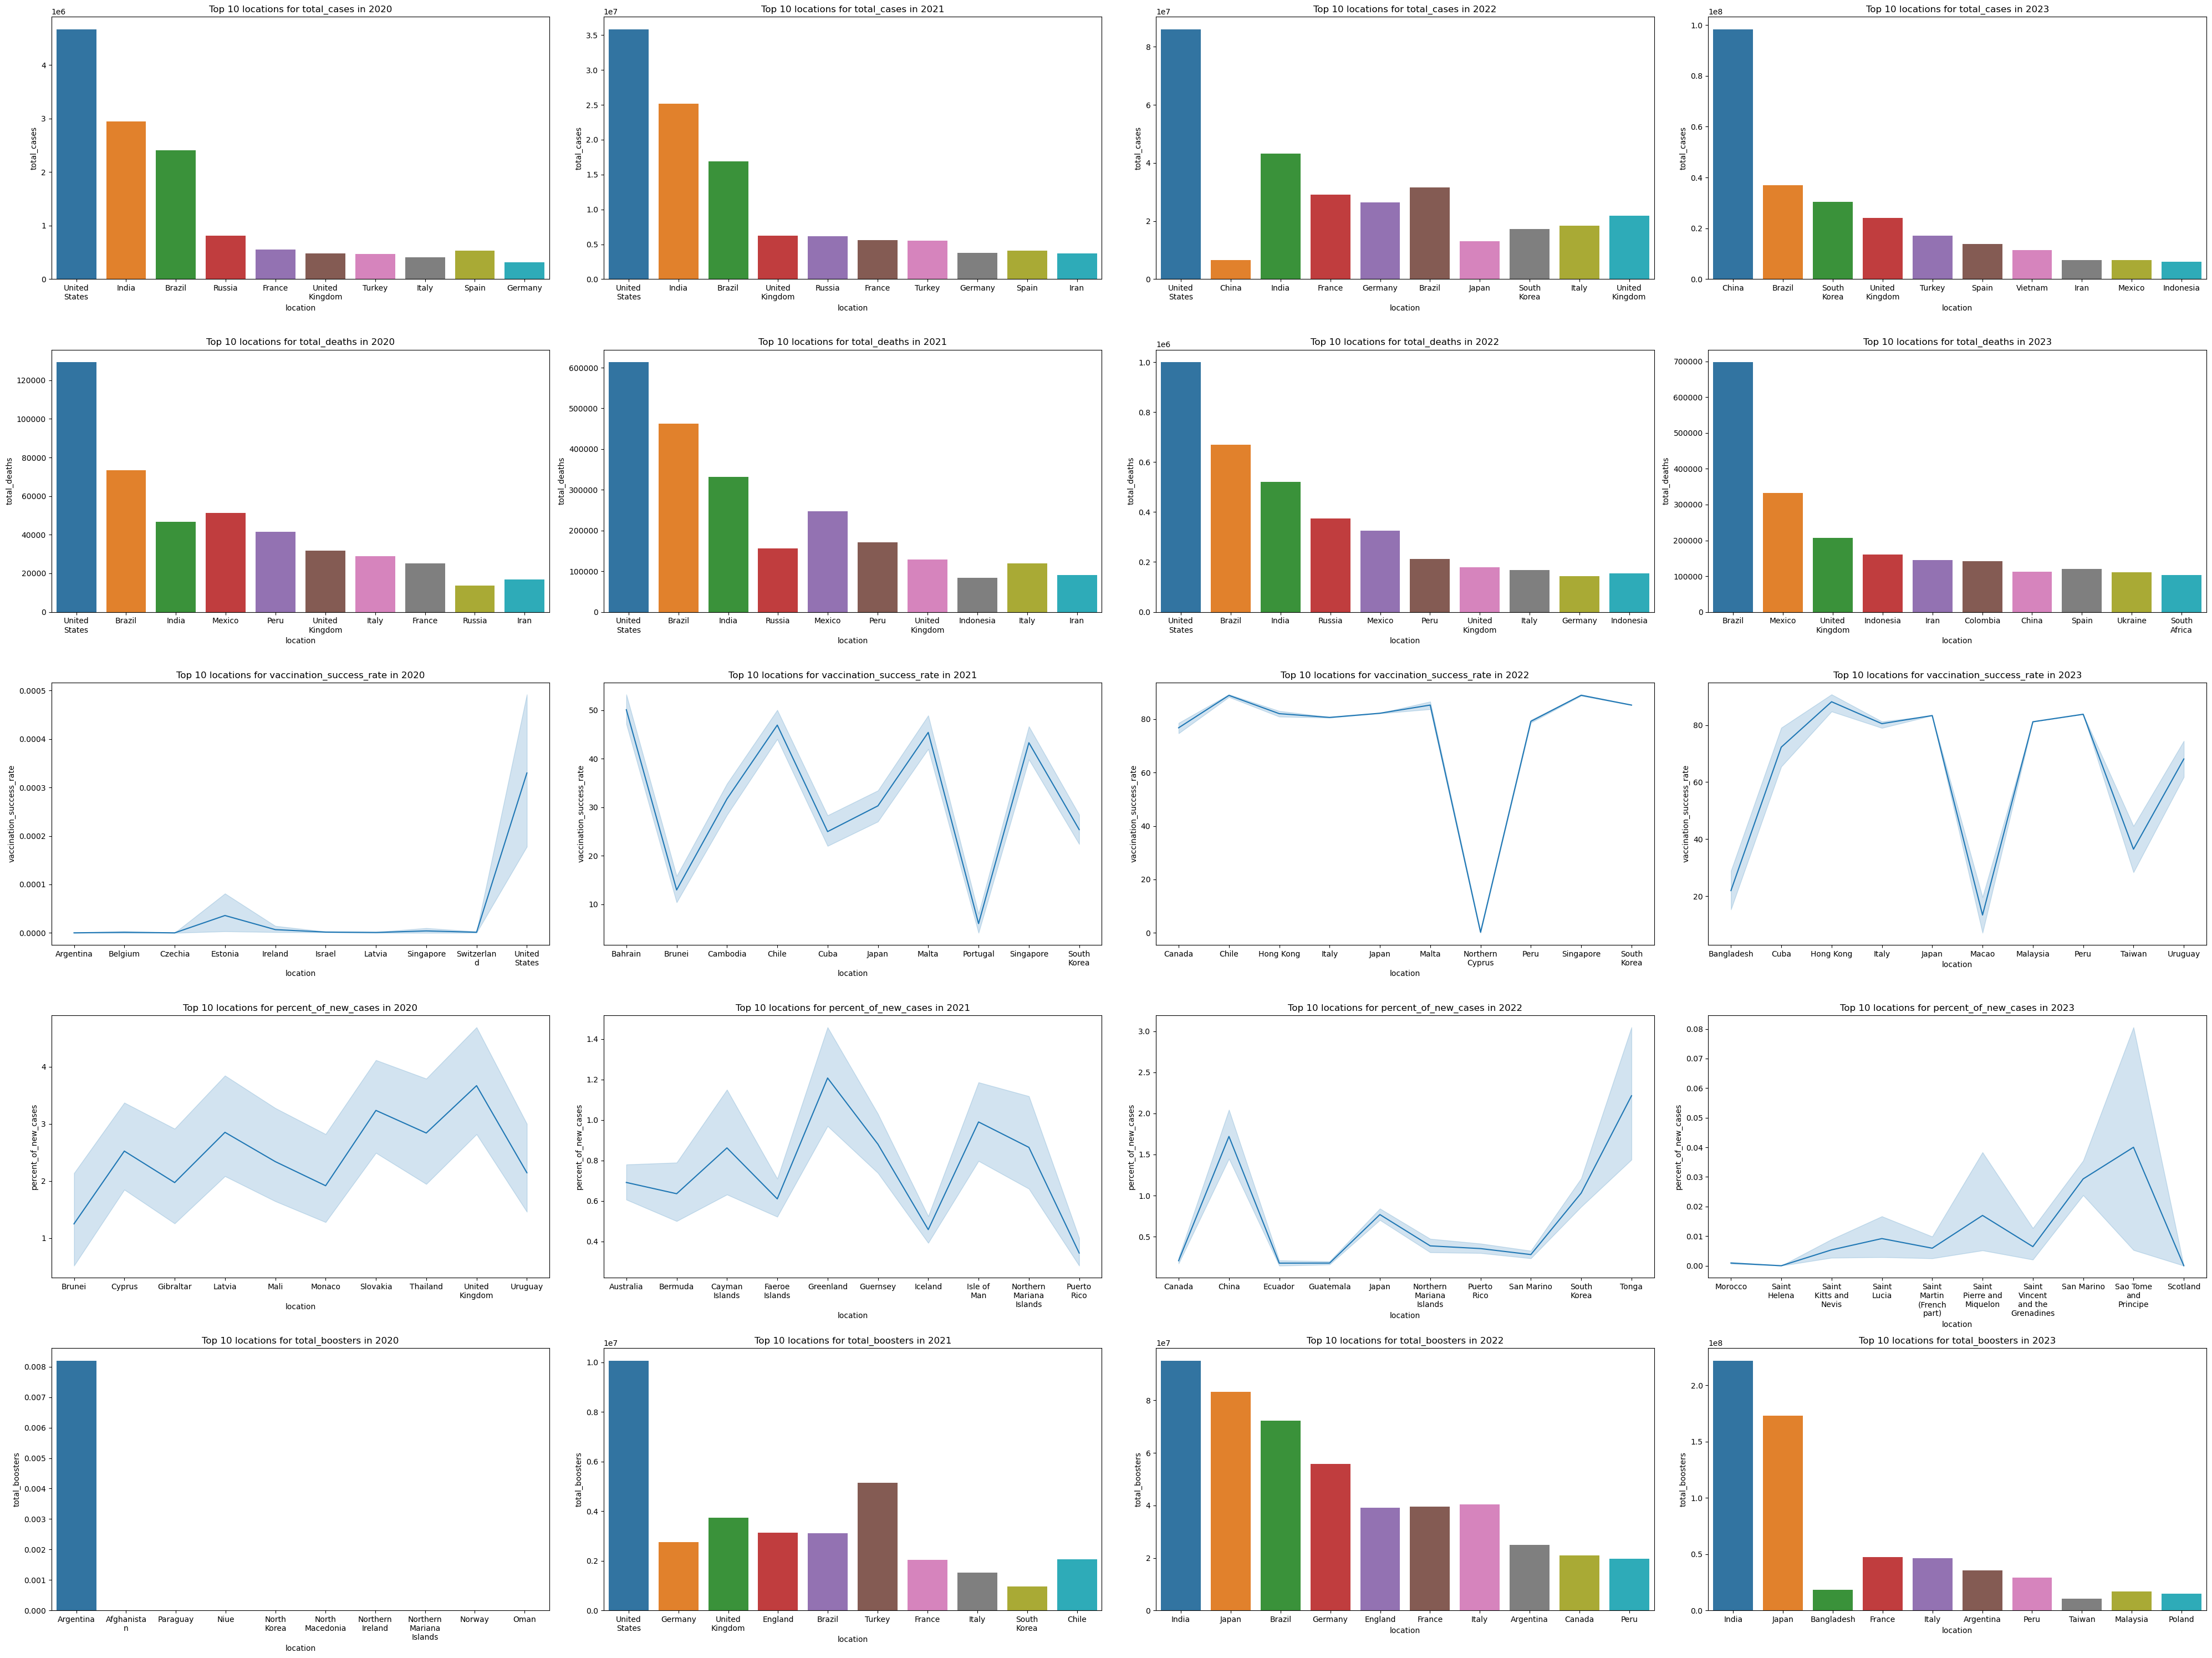

In [29]:
# Plotting

fig, axes = plt.subplots(len(columns_to_plot), len(last_5_years), figsize=(40, 30))

for j, col in enumerate(columns_to_plot):
    for i, year in enumerate(last_5_years):
        ax = axes[j, i]
        top_10_for_col = top_locations[year][col]
        data_to_plot = location_df[(location_df['year'] == year) & (location_df['location'].isin(top_10_for_col))]

        # Check the type of plot
        if col in ['total_cases', 'total_deaths', 'total_boosters']:  # Barplot
            sns.barplot(x='location', y=col, data=data_to_plot, ax=ax, order=top_10_for_col, errorbar=None)
        else:  # Lineplot
            sns.lineplot(x='location', y=col, data=data_to_plot, ax=ax, sort=False)

        ax.set_title(f'Top 10 locations for {col} in {year}')
        
        # Explicitly set tick positions to match the number of labels
        ax.set_xticks(range(len(top_10_for_col)))
        ax.set_xticklabels([textwrap.fill(label.get_text(), 10) for label in ax.get_xticklabels()], rotation=0)

plt.tight_layout()
plt.show()

***MoM deaths and cases for the past 5 years***

In [45]:
mom_df = location_df.copy()
mom_df['week'] = mom_df['date'].dt.isocalendar().week

In [46]:
import calendar

# Create an ordered list of abbreviated month names
mom_df['month'] = pd.Categorical(mom_df['month'], categories=list(calendar.month_abbr)[1:], ordered=True)

mom_df = mom_df.sort_values(['year', 'month', 'date'])# Sort DataFrame by year and month
mom_df

,continent,location,date,population,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,...,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,year,month,percent_of_new_cases,vaccination_success_rate,week
10764,South America,Argentina,2020-01-01,45510324,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.0,0.0,0.0,0.0,2020,Jan,0.0,0.0,1
169452,North America,Mexico,2020-01-01,127504120,0.0,0.0,0.0,0.0,0.0,0.0,...,0.78,0.0,0.0,0.0,0.0,2020,Jan,0.0,0.0,1
10765,South America,Argentina,2020-01-02,45510324,0.0,0.0,0.0,0.0,0.0,0.0,...,0.85,0.0,0.0,0.0,0.0,2020,Jan,0.0,0.0,1
169453,North America,Mexico,2020-01-02,127504120,0.0,0.0,0.0,0.0,0.0,0.0,...,0.78,0.0,0.0,0.0,0.0,2020,Jan,0.0,0.0,1
0,Asia,Afghanistan,2020-01-03,41128772,0.0,0.0,0.0,0.0,0.0,0.0,...,0.51,0.0,0.0,0.0,0.0,2020,Jan,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99262,Europe,Germany,2023-04-18,83369840,0.0,0.0,0.0,0.0,0.0,0.0,...,0.95,0.0,0.0,0.0,0.0,2023,Apr,0.0,0.0,16
129159,Asia,Israel,2023-04-18,9449000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.92,0.0,0.0,0.0,0.0,2023,Apr,0.0,0.0,16
186201,Europe,Netherlands,2023-04-18,17564020,0.0,0.0,0.0,0.0,0.0,0.0,...,0.94,0.0,0.0,0.0,0.0,2023,Apr,0.0,0.0,16
222740,Europe,Russia,2023-04-18,144713312,0.0,0.0,0.0,0.0,0.0,0.0,...,0.82,0.0,0.0,0.0,0.0,2023,Apr,0.0,0.0,16


In [51]:
filtered_df = mom_df[mom_df['year'].isin(last_5_years)]

# Group by 'year' and 'month', and sum 'total_cases' and 'total_deaths'
grouped_df = filtered_df.groupby(['year', 'month']).agg({'total_cases': 'sum', 'total_deaths': 'sum'}).reset_index()

# Calculate the log; replace negative infinity and NaN with a small number
grouped_df['log_total_cases'] = np.log(grouped_df['total_cases'] + 1e-10)
grouped_df['log_total_deaths'] = np.log(grouped_df['total_deaths'] + 1e-10)

 Plotting MoM and WoW Metrics

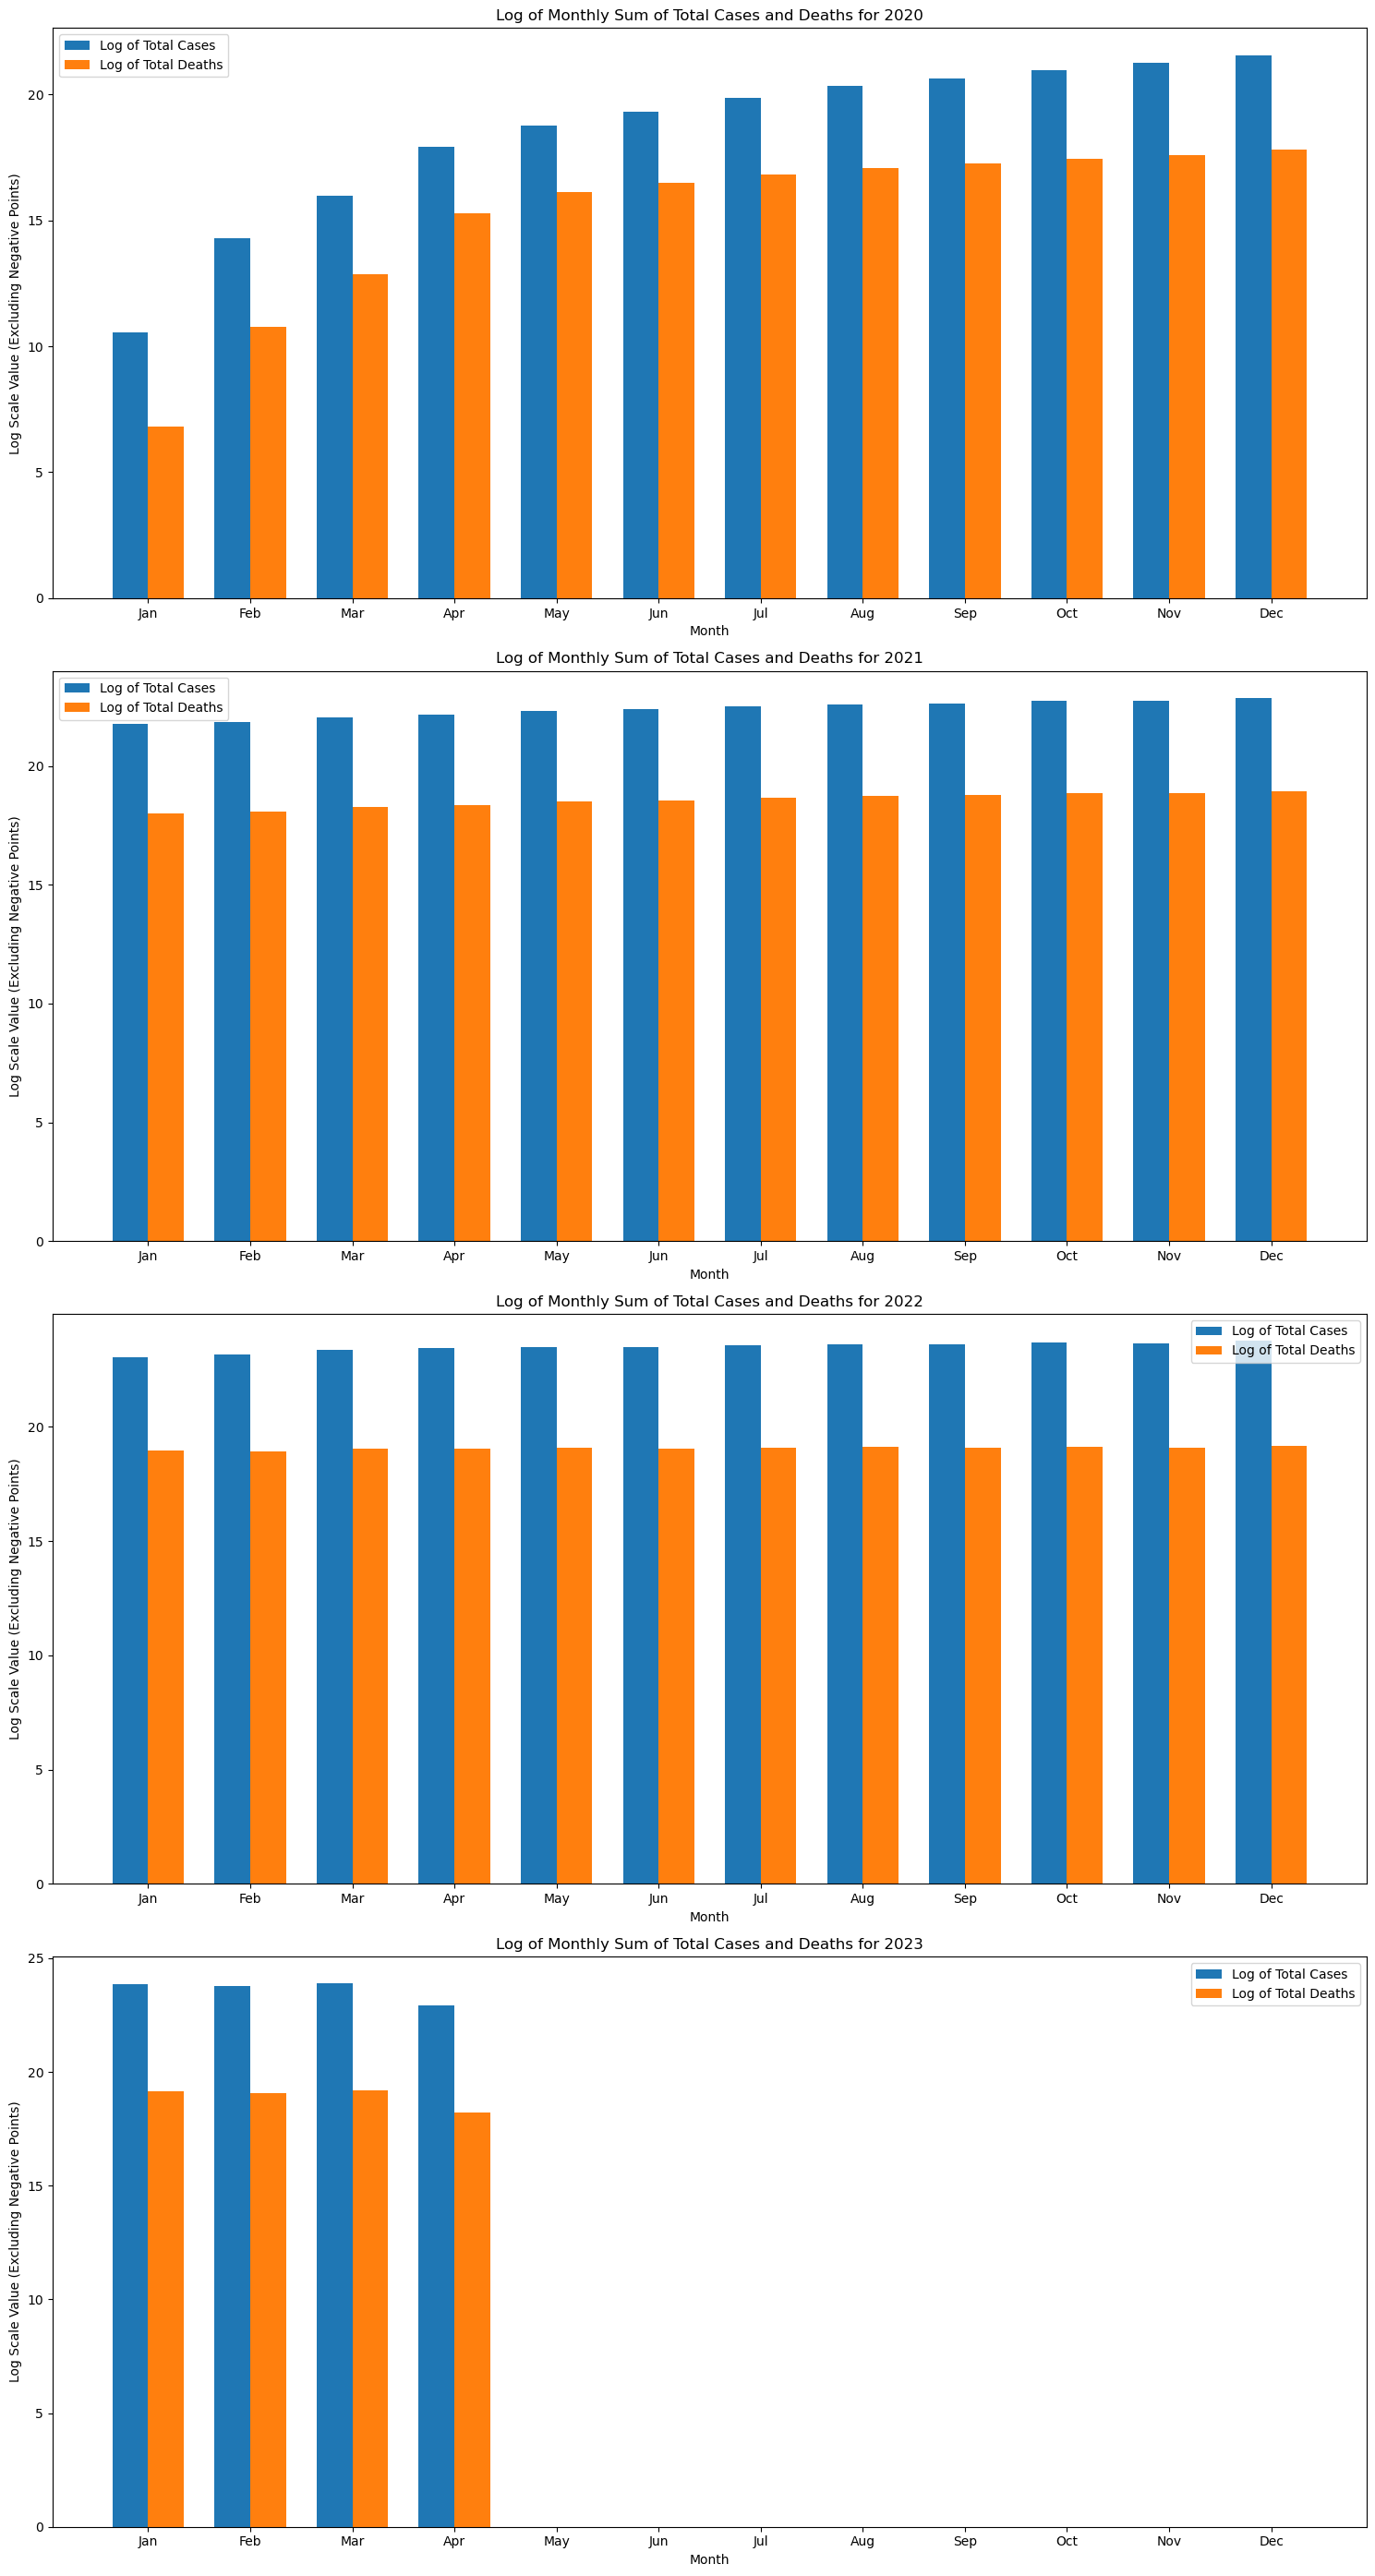

In [65]:
fig, axes = plt.subplots(len(last_5_years), 1, figsize=(15, 7 * len(last_5_years)))

# Loop through each year
for i, year in enumerate(last_5_years):
    ax = axes[i]
    yearly_data = grouped_df[grouped_df['year'] == year].copy()  # Create a copy of the DataFrame

    # Exclude negative points from log values using .loc accessor
    yearly_data.loc[yearly_data['log_total_cases'] <= 0, 'log_total_cases'] = 0
    yearly_data.loc[yearly_data['log_total_deaths'] <= 0, 'log_total_deaths'] = 0

    x = np.arange(len(yearly_data['month']))  # the label locations
    width = 0.35  # the width of the bars

    # Create clustered bar chart
    ax.bar(x - width/2, yearly_data['log_total_cases'], width, label='Log of Total Cases')
    ax.bar(x + width/2, yearly_data['log_total_deaths'], width, label='Log of Total Deaths')

    # Add labels and title
    ax.set_xlabel('Month')
    ax.set_ylabel('Log Scale Value (Excluding Negative Points)')
    ax.set_title(f'Log of Monthly Sum of Total Cases and Deaths for {year}')
    ax.set_xticks(x)
    ax.set_xticklabels(yearly_data['month'])
    ax.legend()

plt.tight_layout()
plt.show()


***Geographical Analysis***

In [37]:
grouped_df

,year,month,population,total_cases,new_cases,total_deaths,new_deaths,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,...,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million,percent_of_new_cases,vaccination_success_rate,week,total_cases_MoM,total_cases_MoM_log,total_deaths_MoM,total_deaths_MoM_log
0,2020,Jan,3.395689e+07,5.525195e+00,1.450272,0.133833,0.031291,0.000968,0.000094,0.000022,...,-0.210538,-0.190783,-1.238384,0.711577,0.000000,3.139121,NaN,0.0,NaN,0.0
1,2020,Feb,3.379878e+07,2.373195e+02,10.940824,6.841613,0.396844,0.022419,0.005562,0.000454,...,-0.164139,-0.117675,-2.391645,1.332322,0.000000,7.275862,NaN,0.0,NaN,0.0
2,2020,Mar,3.360589e+07,1.176428e+03,100.546181,52.509074,5.487947,6.838237,2.331536,0.275465,...,-0.154361,0.064713,-3.674871,10.561742,0.000000,11.584236,NaN,0.0,NaN,0.0
3,2020,Apr,3.351497e+07,8.391910e+03,321.495278,602.490139,26.986806,16.543930,24.251841,0.969991,...,0.005390,0.482689,-0.663769,4.423593,0.000000,15.933333,NaN,0.0,NaN,0.0
4,2020,May,3.351939e+07,1.898236e+04,389.624546,1347.546444,21.535421,14.133249,45.836729,0.465703,...,0.096126,0.357111,1.452695,2.258137,0.000000,20.258099,NaN,0.0,NaN,0.0
5,2020,Jun,3.351497e+07,3.364853e+04,594.906389,1982.825278,21.267500,19.974254,58.214182,0.415712,...,0.129108,0.369232,2.692900,1.589842,0.000000,24.666667,NaN,0.0,NaN,0.0
6,2020,Jul,3.351497e+07,5.722409e+04,946.825941,2677.394624,24.892070,26.394498,72.605901,0.533533,...,0.169753,0.468716,4.535667,1.372615,0.000000,29.0,NaN,0.0,NaN,0.0
7,2020,Aug,3.351497e+07,9.012330e+04,1116.138038,3492.457124,26.046102,35.086320,90.528079,0.597438,...,0.249569,0.582614,8.356406,1.237024,0.000000,33.419355,NaN,0.0,NaN,0.0
8,2020,Sep,3.351497e+07,1.254129e+05,1210.813611,4249.230417,23.491806,44.263296,110.387394,0.686454,...,0.237307,0.394049,9.419331,0.965303,0.000000,37.8,NaN,0.0,NaN,0.0
9,2020,Oct,3.351497e+07,1.673950e+05,1665.177151,4952.240054,24.463575,76.673390,132.542308,0.882726,...,0.245919,0.445978,11.361142,1.082716,0.000000,42.129032,NaN,0.0,NaN,0.0


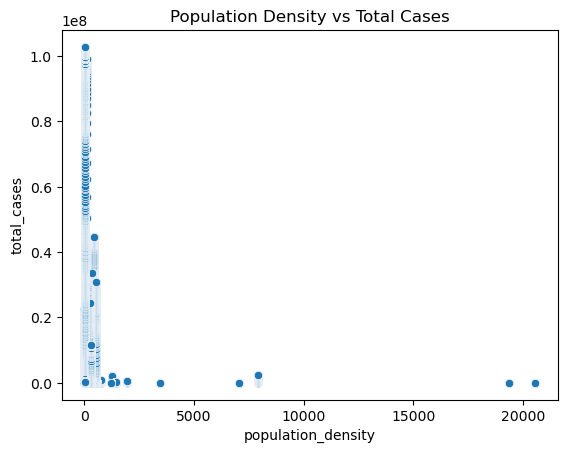

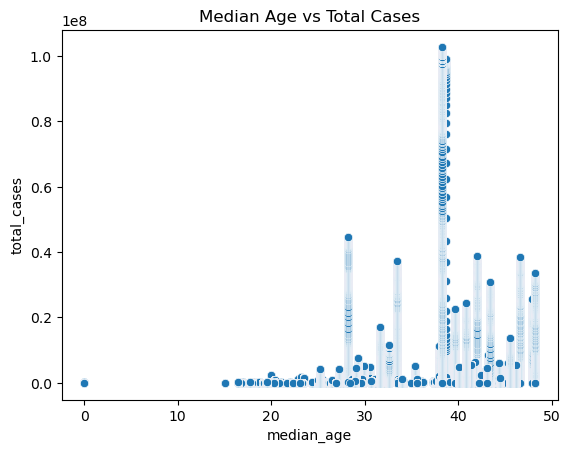

In [38]:
# Plotting population density vs total cases
sns.scatterplot(x='population_density', y='total_cases', data=regional_df)
plt.title('Population Density vs Total Cases')
plt.show()

# Plotting median age vs total cases
sns.scatterplot(x='median_age', y='total_cases', data=regional_df)
plt.title('Median Age vs Total Cases')
plt.show()


# Assuming you have a DataFrame 'df' with 'Latitude', 'Longitude', and 'Confirmed Cases'
import folium

m = folium.Map(location=[20, 0], zoom_start=3)

for index, row in df.iterrows():
    folium.CircleMarker([row['Latitude'], row['Longitude']],
                        radius=row['Confirmed Cases']/1000000,
                        color="red",
                        fill=True,
                        fill_opacity=0.4,
                        ).add_to(m)
                        
m.save("Geographical_Analysis.html")
s

***Economic/Policy Analysis***

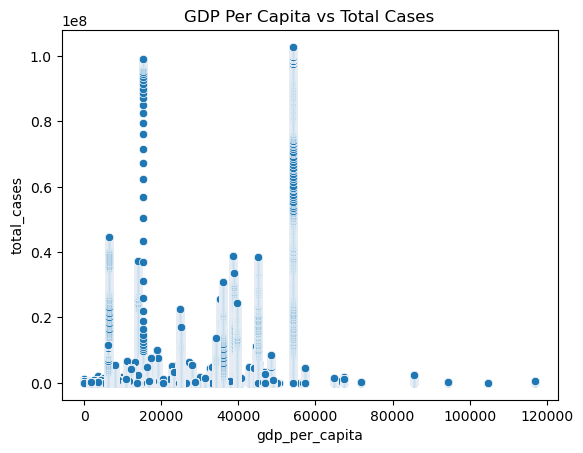

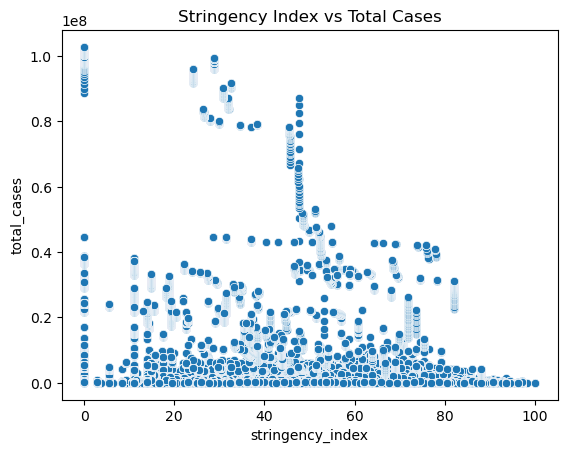

In [39]:
# Plotting GDP per capita vs total cases
sns.scatterplot(x='gdp_per_capita', y='total_cases', data=regional_df)
plt.title('GDP Per Capita vs Total Cases')
plt.show()

# Plotting stringency index vs total cases
sns.scatterplot(x='stringency_index', y='total_cases', data=regional_df)
plt.title('Stringency Index vs Total Cases')
plt.show()

# Assuming 'df_policy' DataFrame contains 'Date', 'Policy_Type', and 'Effectiveness_Score'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Effectiveness_Score', hue='Policy_Type', data=df_policy)
plt.title('Effectiveness of Different Policies Over Time')
plt.xlabel('Date')
plt.ylabel('Effectiveness Score')
plt.show()

